In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [2]:
# Data_Directory = './Data/15_Nov_Readings'
Data_Directory = './Data/23_Dec_Readings'
# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [3]:
import re

def convert_log_to_dict(log_string):
    # Regular expression to extract the necessary information
    pattern = r"\d+\. (ble_datalog__Rx_\d__\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}) \(grid (\d+),(\d+)\)"
    matches = re.findall(pattern, log_string)

    # Constructing the dictionary in the desired format
    result = {}
    for match in matches:
        filename = f"{match[0]}.csv"
        grid_coordinates = (int(match[1]), int(match[2]))
        result[filename] = grid_coordinates

    return result

# Input log string
log_string = """

1. ble_datalog__Rx_0__2024-12-23_14-58-47 (grid 7,0)
2. ble_datalog__Rx_0__2024-12-23_15-11-26 (grid 7,2)
3. ble_datalog__Rx_0__2024-12-23_15-22-34 (grid 7,4)
4. ble_datalog__Rx_0__2024-12-23_15-33-04 (grid 7,6)
5. ble_datalog__Rx_0__2024-12-23_15-44-04 (grid 6,6)
6. ble_datalog__Rx_0__2024-12-23_15-56-33 (grid 6,4)
7. ble_datalog__Rx_0__2024-12-23_16-08-28 (grid 6,2)
8. ble_datalog__Rx_0__2024-12-23_16-21-11 (grid 6,0)
9. ble_datalog__Rx_1__2024-12-23_14-58-47 (grid 7,1)
10. ble_datalog__Rx_1__2024-12-23_15-11-26 (grid 7,3)
11. ble_datalog__Rx_1__2024-12-23_15-22-34 (grid 7,5)
12. ble_datalog__Rx_1__2024-12-23_15-33-04 (grid 7,7)
13. ble_datalog__Rx_1__2024-12-23_15-44-04 (grid 6,7)
14. ble_datalog__Rx_1__2024-12-23_15-56-33 (grid 6,5)
15. ble_datalog__Rx_1__2024-12-23_16-08-28 (grid 6,3)
16. ble_datalog__Rx_1__2024-12-23_16-08-28 (grid 6,1)

17. ble_datalog__Rx_0__2024-12-23_14-40-46 (grid 0,0)
18. ble_datalog__Rx_0__2024-12-23_14-52-21 (grid 1,2)
19. ble_datalog__Rx_0__2024-12-23_15-03-06 (grid 0,3)
20. ble_datalog__Rx_0__2024-12-23_15-14-18 (grid 0,5)
21. ble_datalog__Rx_0__2024-12-23_15-26-15 (grid 0,7)
22. ble_datalog__Rx_0__2024-12-23_15-36-27 (grid 2,6)
23. ble_datalog__Rx_0__2024-12-23_15-47-08 (grid 3,5)
24. ble_datalog__Rx_0__2024-12-23_16-00-12 (grid 3,3)
25. ble_datalog__Rx_0__2024-12-23_16-11-01 (grid 2,2)
26. ble_datalog__Rx_0__2024-12-23_16-22-20 (grid 2,0)

27. ble_datalog__Rx_1__2024-12-23_14-40-46 (grid 0,1)
28. ble_datalog__Rx_1__2024-12-23_14-52-21 (grid 1,1)
29. ble_datalog__Rx_1__2024-12-23_15-03-06 (grid 0,4)
30. ble_datalog__Rx_1__2024-12-23_15-14-18 (grid 1,5)
31. ble_datalog__Rx_1__2024-12-23_15-26-15 (grid 0,6)
32. ble_datalog__Rx_1__2024-12-23_15-36-27 (grid 2,7)
33. ble_datalog__Rx_1__2024-12-23_15-47-08 (grid 2,5)
34. ble_datalog__Rx_1__2024-12-23_16-00-12 (grid 3,4)
35. ble_datalog__Rx_1__2024-12-23_16-11-01 (grid 2,1)
36. ble_datalog__Rx_1__2024-12-23_16-22-20 (grid 3,0)
 
37. ble_datalog__Rx_2__2024-12-23_14-40-46 (grid 1,0)
38. ble_datalog__Rx_2__2024-12-23_14-52-21 (grid 0,2)
39. ble_datalog__Rx_2__2024-12-23_15-03-06 (grid 1,3)
40. ble_datalog__Rx_2__2024-12-23_15-14-18 (grid 1,4)
41. ble_datalog__Rx_2__2024-12-23_15-26-15 (grid 1,6)
42. ble_datalog__Rx_2__2024-12-23_15-36-27 (grid 1,7) 
43. ble_datalog__Rx_2__2024-12-23_15-47-08 (grid 2,4)
44. ble_datalog__Rx_2__2024-12-23_16-00-12 (grid 2,3)
45. ble_datalog__Rx_2__2024-12-23_16-11-01 (grid 3,2)
46. ble_datalog__Rx_2__2024-12-23_16-22-20 (grid 3,1)


"""

coord_mapping  = convert_log_to_dict(log_string)

print(f"{{\n    {coord_mapping}\n}}")



{
    {'ble_datalog__Rx_0__2024-12-23_14-58-47.csv': (7, 0), 'ble_datalog__Rx_0__2024-12-23_15-11-26.csv': (7, 2), 'ble_datalog__Rx_0__2024-12-23_15-22-34.csv': (7, 4), 'ble_datalog__Rx_0__2024-12-23_15-33-04.csv': (7, 6), 'ble_datalog__Rx_0__2024-12-23_15-44-04.csv': (6, 6), 'ble_datalog__Rx_0__2024-12-23_15-56-33.csv': (6, 4), 'ble_datalog__Rx_0__2024-12-23_16-08-28.csv': (6, 2), 'ble_datalog__Rx_0__2024-12-23_16-21-11.csv': (6, 0), 'ble_datalog__Rx_1__2024-12-23_14-58-47.csv': (7, 1), 'ble_datalog__Rx_1__2024-12-23_15-11-26.csv': (7, 3), 'ble_datalog__Rx_1__2024-12-23_15-22-34.csv': (7, 5), 'ble_datalog__Rx_1__2024-12-23_15-33-04.csv': (7, 7), 'ble_datalog__Rx_1__2024-12-23_15-44-04.csv': (6, 7), 'ble_datalog__Rx_1__2024-12-23_15-56-33.csv': (6, 5), 'ble_datalog__Rx_1__2024-12-23_16-08-28.csv': (6, 1), 'ble_datalog__Rx_0__2024-12-23_14-40-46.csv': (0, 0), 'ble_datalog__Rx_0__2024-12-23_14-52-21.csv': (1, 2), 'ble_datalog__Rx_0__2024-12-23_15-03-06.csv': (0, 3), 'ble_datalog__Rx_0__2

In [4]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [5]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,...,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,127,-99.00,0.0,-77,4.11,0.0,-73,4.09,0.0,-75,...,4.05,0.0,-50,4.10,0.0,-75,-2.00,0.0,7,0
1,127,-99.00,24.0,-74,4.11,24.0,-73,-2.00,28.0,-76,...,4.06,28.0,-49,4.10,29.0,-76,4.04,25.0,7,0
2,-82,-2.00,53.0,-79,-2.00,58.0,-73,4.09,58.0,-79,...,4.06,58.0,-49,4.11,60.0,-78,4.06,57.0,7,0
3,-82,4.11,81.0,-73,-2.00,83.0,-73,4.09,84.0,-75,...,-2.00,88.0,-49,4.09,90.0,-77,4.06,86.0,7,0
4,-81,-2.00,111.0,-72,4.11,111.0,-72,-2.00,115.0,-78,...,4.06,111.0,-48,4.11,111.0,-76,4.04,108.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-75,-2.00,390.0,-66,4.10,389.0,-81,4.08,383.0,-63,...,4.05,381.0,-74,4.11,382.0,-64,4.05,383.0,3,1
896,-76,-2.00,414.0,-65,4.11,414.0,-81,4.09,408.0,-63,...,-2.00,407.0,-75,4.10,408.0,-63,4.06,409.0,3,1
897,-77,4.11,436.0,-65,4.11,434.0,-79,4.09,429.0,-64,...,4.06,422.0,-76,4.10,421.0,-63,-2.00,426.0,3,1
898,-77,4.11,453.0,-65,4.11,452.0,-81,-2.00,451.0,-63,...,4.05,443.0,-76,4.11,443.0,-65,-2.00,447.0,3,1


In [6]:
cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
# cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)
# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
['Tx_0 Batt', 'Tx_1 Batt', 'Tx_2 Batt', 'Tx_3 Batt', 'Tx_4 Batt', 'Tx_5 Batt', 'Tx_6 Batt', 'Tx_7 Batt']


,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,...,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,127,NaN,0.0,-77,4.11,0.0,-73,4.09,0.0,-75,...,4.05,0.0,-50,4.10,0.0,-75,NaN,0.0,7,0
1,127,NaN,24.0,-74,4.11,24.0,-73,NaN,28.0,-76,...,4.06,28.0,-49,4.10,29.0,-76,4.04,25.0,7,0
2,-82,NaN,53.0,-79,NaN,58.0,-73,4.09,58.0,-79,...,4.06,58.0,-49,4.11,60.0,-78,4.06,57.0,7,0
3,-82,4.11,81.0,-73,NaN,83.0,-73,4.09,84.0,-75,...,NaN,88.0,-49,4.09,90.0,-77,4.06,86.0,7,0
4,-81,NaN,111.0,-72,4.11,111.0,-72,NaN,115.0,-78,...,4.06,111.0,-48,4.11,111.0,-76,4.04,108.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-75,NaN,390.0,-66,4.10,389.0,-81,4.08,383.0,-63,...,4.05,381.0,-74,4.11,382.0,-64,4.05,383.0,3,1
896,-76,NaN,414.0,-65,4.11,414.0,-81,4.09,408.0,-63,...,NaN,407.0,-75,4.10,408.0,-63,4.06,409.0,3,1
897,-77,4.11,436.0,-65,4.11,434.0,-79,4.09,429.0,-64,...,4.06,422.0,-76,4.10,421.0,-63,NaN,426.0,3,1
898,-77,4.11,453.0,-65,4.11,452.0,-81,NaN,451.0,-63,...,4.05,443.0,-76,4.11,443.0,-65,NaN,447.0,3,1


In [7]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/23_Dec_Readings\combined_data.csv


#### Data visualisation of raw data

    X_Coord  Y_Coord  Count
0         0        0     20
1         0        1     20
2         0        2     20
3         0        3     20
4         0        4     20
5         0        5     20
6         0        6     20
7         0        7     20
8         1        0     20
9         1        1     20
10        1        2     20
11        1        3     20
12        1        4     20
13        1        5     20
14        1        6     20
15        1        7     20
16        2        0     20
17        2        1     20
18        2        2     20
19        2        3     20
20        2        4     20
21        2        5     20
22        2        6     20
23        2        7     20
24        3        0     20
25        3        1     20
26        3        2     20
27        3        3     20
28        3        4     20
29        3        5     20
30        6        0     20
31        6        1     20
32        6        2     20
33        6        4     20
34        6        5

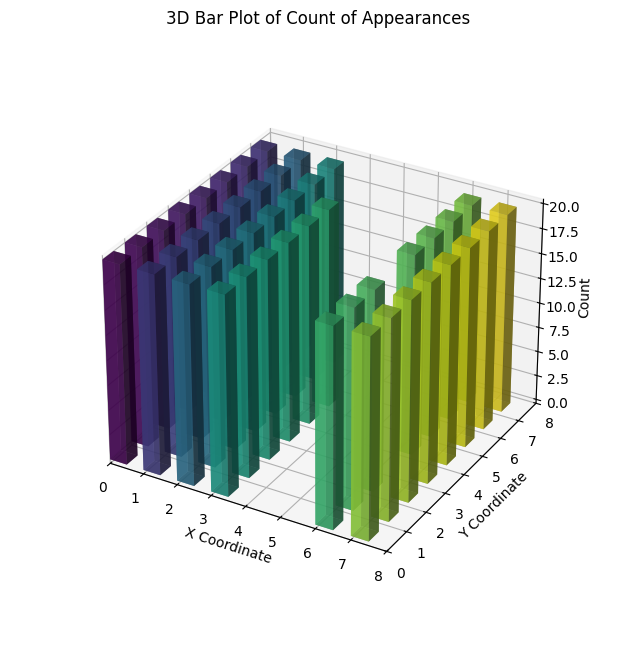

In [8]:
# Count appearances of (X_Coord, Y_Coord) pairs
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')
print(count_data)
# Create a grid for the surface plot
x = count_data['X_Coord'].unique()
y = count_data['Y_Coord'].unique()
X, Y = np.meshgrid(x, y)

# Prepare the Z values (Count)
Z = np.zeros_like(X)

for i in range(len(count_data)):
    x_idx = np.where(x == count_data['X_Coord'].iloc[i])[0][0]
    y_idx = np.where(y == count_data['Y_Coord'].iloc[i])[0][0]
    Z[y_idx, x_idx] = count_data['Count'].iloc[i]


colors = plt.cm.viridis(np.linspace(0, 1, len(count_data)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D bar plot

x = count_data['X_Coord']
y = count_data['Y_Coord']
z = np.zeros(len(count_data))
dx = dy = 0.5  # Width and depth of bars
dz = count_data['Count']

ax.bar3d(x, y, z, dx, dy, dz, color=colors, alpha=0.7)

ax.set_xlabel('X Coordinate')
ax.set_xlim([0,8])
ax.set_ylabel('Y Coordinate')
ax.set_ylim([0,8])
ax.set_zlabel('Count')

ax.set_title('3D Bar Plot of Count of Appearances')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()
fig.savefig('./figures/No._Data.png')

## Calculating average in RSSI and Batt


In [9]:
def create_avg_df(combined_df):
    # Group by X_Coord and Y_Coord
    combined_df = combined_df.drop([col for col in combined_df.columns if 'Time' in col], axis=1)

    grouped = combined_df.groupby(['X_Coord', 'Y_Coord']).mean().reset_index()

    # Rename columns to reflect that these are averages
    avg_columns = {col: col.replace('RSSI', 'RSSI_Avg').replace('Batt', 'Batt_Avg') for col in grouped.columns if 'RSSI' in col or 'Batt' in col}
    
    # Apply the renaming to the grouped DataFrame
    grouped.rename(columns=avg_columns, inplace=True)
    
    return grouped

In [10]:
avg_df = create_avg_df(combined_df)
data = avg_df
data

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_0 Batt_Avg,Tx_1 RSSI_Avg,Tx_1 Batt_Avg,Tx_2 RSSI_Avg,Tx_2 Batt_Avg,Tx_3 RSSI_Avg,Tx_3 Batt_Avg,Tx_4 RSSI_Avg,Tx_4 Batt_Avg,Tx_5 RSSI_Avg,Tx_5 Batt_Avg,Tx_6 RSSI_Avg,Tx_6 Batt_Avg,Tx_7 RSSI_Avg,Tx_7 Batt_Avg
0,0,0,-57.00,4.114500,-71.20,4.110000,-18.55,4.092000,-76.15,4.084667,-40.05,4.075333,-77.20,4.055333,-79.90,4.100667,-73.75,4.057500
1,0,1,-67.05,4.106250,-65.75,4.107500,-57.70,4.090000,-75.05,4.081875,12.55,4.074444,-73.95,4.056000,-70.30,4.102857,-76.55,4.055000
2,0,2,-70.45,4.108824,-63.80,4.112000,-77.55,4.091667,-68.05,4.078824,-71.15,4.079375,-67.05,4.052857,-67.50,4.100769,-70.05,4.054706
3,0,3,-68.70,4.111765,-60.60,4.108125,-72.90,4.089444,-74.40,4.080625,-76.75,4.071250,-76.40,4.051000,-72.70,4.101000,-68.40,4.054375
4,0,4,-71.95,4.109286,-57.95,4.107500,74.85,4.088000,-66.65,4.084286,-77.00,4.072308,-77.40,4.054615,-73.25,4.099231,-68.65,4.057692
5,0,5,2.00,4.111250,-43.55,4.109333,-44.55,4.088667,-51.90,4.078333,1.15,4.071429,-44.70,4.057500,-56.55,4.099286,-44.40,4.056667
6,0,6,-71.55,4.096667,-69.55,4.109375,-70.15,4.084615,-56.80,4.080714,-70.90,4.074286,-68.75,4.054167,-75.30,4.101429,-70.50,4.058667
7,0,7,-51.95,4.105000,-73.95,4.107500,-59.60,4.086000,-73.50,4.078571,-19.75,4.072500,-67.55,4.053125,-73.70,4.102857,-67.35,4.056429
8,1,0,-65.60,4.110000,-73.90,4.109412,-68.15,4.093571,-75.80,4.084737,-60.45,4.076667,-66.00,4.057333,-72.55,4.100000,-56.15,4.057000
9,1,1,-73.50,4.112667,-66.90,4.106667,-73.25,4.090000,-71.85,4.082500,-78.35,4.078235,-62.45,4.054667,-70.95,4.097500,-71.55,4.054000


In [11]:
batt_columns = [col for col in data.columns if 'Batt' in col]

RSSI_columns = data.drop(columns=batt_columns)

pd.set_option('display.max_rows', 100)  # Adjust as needed
pd.set_option('display.max_columns', 100)  # Adjust as needed
pd.set_option('display.max_colwidth', None)
RSSI_columns.head(64)

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_1 RSSI_Avg,Tx_2 RSSI_Avg,Tx_3 RSSI_Avg,Tx_4 RSSI_Avg,Tx_5 RSSI_Avg,Tx_6 RSSI_Avg,Tx_7 RSSI_Avg
0,0,0,-57.00,-71.20,-18.55,-76.15,-40.05,-77.20,-79.90,-73.75
1,0,1,-67.05,-65.75,-57.70,-75.05,12.55,-73.95,-70.30,-76.55
2,0,2,-70.45,-63.80,-77.55,-68.05,-71.15,-67.05,-67.50,-70.05
3,0,3,-68.70,-60.60,-72.90,-74.40,-76.75,-76.40,-72.70,-68.40
4,0,4,-71.95,-57.95,74.85,-66.65,-77.00,-77.40,-73.25,-68.65
5,0,5,2.00,-43.55,-44.55,-51.90,1.15,-44.70,-56.55,-44.40
6,0,6,-71.55,-69.55,-70.15,-56.80,-70.90,-68.75,-75.30,-70.50
7,0,7,-51.95,-73.95,-59.60,-73.50,-19.75,-67.55,-73.70,-67.35
8,1,0,-65.60,-73.90,-68.15,-75.80,-60.45,-66.00,-72.55,-56.15
9,1,1,-73.50,-66.90,-73.25,-71.85,-78.35,-62.45,-70.95,-71.55
